<a href="https://colab.research.google.com/github/ersjunior/3DTS-NaturalLanguageProcessing/blob/main/Exercicios/NLP_Aula_1_Exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exercícios - Aula 1**

## 1) Dado o dataset de produtos [1], descubra e desenvolva:

[1] - https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv

In [1]:
import pandas as pd

df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv",
    delimiter=";",
    encoding='utf-8' )

df.head(5)

,nome,descricao,categoria
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro


#### 1.1. Analisar o % de valores nulos

In [2]:
# resposta
total = len(df)
total_nulo = df.isnull().sum()

perc_nulo = round((total_nulo / total) * 100, 2)

perc_nulo

nome          0.00
descricao    28.53
categoria     0.00
dtype: float64

#### 1.2. Remover as linhas com valores nulos

In [3]:
# resposta
df_limpo = df.dropna()

In [4]:
df_limpo.head(5)

,nome,descricao,categoria
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro


#### 1.3. Distribuição das “categorias”

livro        838
maquiagem    788
brinquedo    668
game         622
Name: categoria, dtype: int64


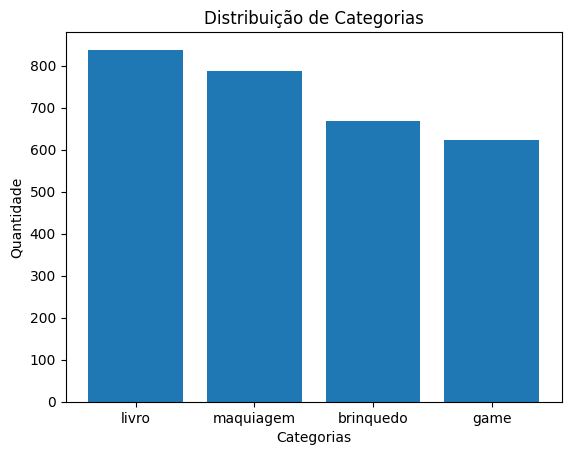

In [5]:
# resposta
import matplotlib.pyplot as plt

dist_categoria = df_limpo['categoria'].value_counts()
print(dist_categoria)

plt.bar(dist_categoria.index, dist_categoria.values)

plt.xlabel('Categorias')
plt.ylabel('Quantidade')
plt.title('Distribuição de Categorias')
plt.show()

#### 1.4 Mostrar as 10 palavras que mais ocorrem na descrição


In [6]:
# exemplo de referência para montar a lógica
from collections import Counter


descricoes = ' '.join(df_limpo['descricao'].astype(str))

palavras = descricoes.split()

counter = Counter()

for palavra in palavras:
  counter.update({palavra: 1})

palavras_mais_comuns = counter.most_common(10)

for palavra, contagem in palavras_mais_comuns:
  print(f'{palavra}: {contagem}')

de: 21579
e: 14331
o: 10019
a: 9743
do: 7760
para: 7136
que: 6420
-: 6288
em: 5912
com: 5173


In [7]:
# exemplo de referência para montar a lógica
from collections import Counter
counter = Counter()
counter['a'] += 1
counter
counter.most_common()

counter.update('a')
counter.update('b')

## 2) utilizando o df acima carregado, faça:

In [8]:
import pandas as pd

df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv",
    delimiter=";",
    encoding='utf-8' )

df.shape

(4080, 3)

In [9]:
df.head()

,nome,descricao,categoria
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro


#### 2.1. Elimine linhas com valores nulos

In [10]:
# resposta
df = df.dropna()

df.shape

(2916, 3)

#### 2.2. Adicione uma nova coluna chamada texto, formada pela composição das colunas nome e descrição

In [11]:
# resposta
df['texto'] = df['nome'] + ' ' + df['descricao']

df.head()

,nome,descricao,categoria,texto
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro,O Hobbit - 7ª Ed. 2013 Produto NovoBilbo Bol...
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro,Livro - It A Coisa - Stephen King Produto No...
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro,Box As Crônicas De Gelo E Fogo Pocket 5 Li...
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro,Box Harry Potter Produto Novo e Físico A sé...
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro,Livro Origem - Dan Brown Produto NovoDe Onde...


#### 2.3. Quantos Unigramas existem antes e depois de remover stopwords (use a coluna texto)

In [12]:
# resposta
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

def count_unigrams(text):
    words = nltk.word_tokenize(text, language='portuguese')
    words = [word.lower() for word in words if word.lower() not in stopwords.words('portuguese') and word not in string.punctuation]
    return len(words)


df['unigramas_antes'] = df['texto'].apply(count_unigrams)
df['unigramas_depois'] = df['texto'].apply(lambda x: len(nltk.word_tokenize(x, language='portuguese')))

total_unigramas_antes = df['unigramas_antes'].sum()
total_unigramas_depois = df['unigramas_depois'].sum()


print(f"Total de unigramas antes de remover as stopwords: {total_unigramas_antes}")
print(f"Total de unigramas depois de remover as stopwords: {total_unigramas_depois}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total de unigramas antes de remover as stopwords: 369055
Total de unigramas depois de remover as stopwords: 646175


#### 2.4. Quantos Bigramas existem antes e depois de remover stopwords (use a coluna texto)

In [13]:
# resposta
def count_bigrams(text):
    words = nltk.word_tokenize(text, language='portuguese')
    words = [word.lower() for word in words if word.lower() not in stopwords.words('portuguese') and word not in string.punctuation]
    bigrams = list(nltk.bigrams(words))
    return len(bigrams)

df['bigramas_antes'] = df['texto'].apply(count_bigrams)
df['bigramas_depois'] = df['texto'].apply(lambda x: len(list(nltk.bigrams(nltk.word_tokenize(x, language='portuguese')))))

total_bigramas_antes = df['bigramas_antes'].sum()
total_bigramas_depois = df['bigramas_depois'].sum()

print(f"Total de bigramas antes de remover as stopwords: {total_bigramas_antes}")
print(f"Total de bigramas depois de remover as stopwords: {total_bigramas_depois}")

Total de bigramas antes de remover as stopwords: 366139
Total de bigramas depois de remover as stopwords: 643259


#### 2.5. Quantos Trigramas existem antes e depois de remover stopwords (use a coluna texto)

In [14]:
# resposta
def count_trigrams(text):
    words = nltk.word_tokenize(text, language='portuguese')
    words = [word.lower() for word in words if word.lower() not in stopwords.words('portuguese') and word not in string.punctuation]
    trigrams = list(nltk.ngrams(words, 3))
    return len(trigrams)

df['trigramas_antes'] = df['texto'].apply(count_trigrams)
df['trigramas_depois'] = df['texto'].apply(lambda x: len(list(nltk.ngrams(nltk.word_tokenize(x, language='portuguese'), 3))))

total_trigramas_antes = df['trigramas_antes'].sum()
total_trigramas_depois = df['trigramas_depois'].sum()

print(f"Total de trigramas antes de remover as stopwords: {total_trigramas_antes}")
print(f"Total de trigramas depois de remover as stopwords: {total_trigramas_depois}")

Total de trigramas antes de remover as stopwords: 363223
Total de trigramas depois de remover as stopwords: 640343


#### 2.6. Quantos unigramas existem na coluna texto após aplicar Stemmer (utilize rslp)

In [15]:
# resposta
from nltk.stem import RSLPStemmer

nltk.download('rslp')

stemmer = RSLPStemmer()

def count_stemmed_unigrams(text):
    words = nltk.word_tokenize(text, language='portuguese')
    words = [stemmer.stem(word.lower()) for word in words if word.lower() not in stopwords.words('portuguese') and word not in string.punctuation]
    return len(words)

df['unigramas_apos_stemmer'] = df['texto'].apply(count_stemmed_unigrams)

total_unigramas_apos_stemmer = df['unigramas_apos_stemmer'].sum()

print(f"Total de unigramas após aplicar o stemmer RSLP: {total_unigramas_apos_stemmer}")

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


Total de unigramas após aplicar o stemmer RSLP: 369055
